In [10]:
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
import warnings
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split

from dataScipy import DataScience as DS

# READ DATA

In [2]:
DATA_FOLDER_PATH = os.getcwd() + '/../data/KS VERI/'
FILE_NAME = 'KS10_FINAL_DATA.csv'
PATH = DATA_FOLDER_PATH + FILE_NAME
FINAL_DF = pd.read_csv(PATH, header=0)
FINAL_DF['Timestamp'] = pd.to_datetime(FINAL_DF['Timestamp'])
FINAL_DF

,Timestamp,PUE,I_KOMP1_HIZ,I_KOMP1_SAAT,I_KOMP2_HIZ,I_KOMP2_SAAT,I_NEM_SET,I_SIC_SET,II_KOMP1_HIZ,II_KOMP1_SAAT,...,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11
0,2023-04-01 00:00:00,1.593893,25.000000,8968.0,0.0,3.0,45.0,23.0,36.200001,12770.0,...,0,0,1,0,0,0,0,0,0,0
1,2023-04-01 00:05:00,1.623764,45.200001,8968.0,0.0,3.0,45.0,23.0,34.000000,12770.0,...,0,0,1,0,0,0,0,0,0,0
2,2023-04-01 00:10:00,1.634981,25.700001,8968.0,0.0,3.0,45.0,23.0,34.700001,12770.0,...,0,0,1,0,0,0,0,0,0,0
3,2023-04-01 00:15:00,1.608970,28.400000,8968.0,0.0,3.0,45.0,23.0,39.900002,12770.0,...,0,0,1,0,0,0,0,0,0,0
4,2023-04-01 00:20:00,1.554008,28.000000,8968.0,0.0,3.0,45.0,23.0,36.900002,12770.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59625,2023-10-25 00:45:00,1.611181,26.400000,13761.0,0.0,3.0,45.0,22.0,0.000000,17241.0,...,0,0,0,0,0,0,0,0,1,0
59626,2023-10-25 00:50:00,1.831158,39.200001,13761.0,0.0,3.0,45.0,22.0,49.700001,17241.0,...,0,0,0,0,0,0,0,0,1,0
59627,2023-10-25 00:55:00,1.627907,44.000000,13761.0,0.0,3.0,45.0,22.0,0.000000,17241.0,...,0,0,0,0,0,0,0,0,1,0
59628,2023-10-25 01:00:00,1.590126,0.000000,13761.0,0.0,3.0,45.0,22.0,29.400000,17241.0,...,0,0,0,0,0,0,0,0,1,0


In [41]:
FINAL_DF.columns

Index(['Timestamp', 'PUE', 'I_KOMP1_HIZ', 'I_KOMP1_SAAT', 'I_KOMP2_HIZ',
       'I_KOMP2_SAAT', 'I_NEM_SET', 'I_SIC_SET', 'II_KOMP1_HIZ',
       'II_KOMP1_SAAT', 'II_KOMP2_HIZ', 'II_KOMP2_SAAT', 'II_NEM_SET',
       'II_SIC_SET', 'III_KOMP1_HIZ', 'III_KOMP1_SAAT', 'III_KOMP2_HIZ',
       'III_KOMP2_SAAT', 'III_NEM_SET', 'III_SIC_SET', 'IV_KOMP1_HIZ',
       'IV_KOMP1_SAAT', 'IV_KOMP2_HIZ', 'IV_KOMP2_SAAT', 'IV_NEM_SET',
       'CH1_CIKIS_SIC', 'CH1_GIRIS_SIC', 'CH2_CIKIS_SIC', 'CH2_GIRIS_SIC',
       'CH3_CIKIS_SIC', 'CH3_GIRIS_SIC', 'SENSOR_I_TEMP', 'SENSOR_II_TEMP',
       'OUTLET_TEMP', 'OUTLET_HUMIDITY', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri',
       'Sat', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5'

# DATA VISUALIZATION

## PUE

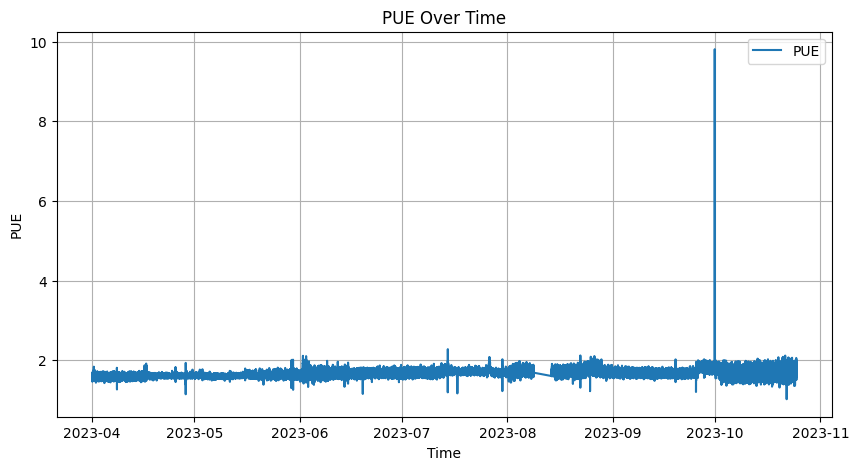

In [3]:
plt.figure(figsize=(10, 5))

plt.plot(FINAL_DF['Timestamp'],FINAL_DF['PUE'], label='PUE')

plt.title('PUE Over Time')
plt.xlabel('Time')
plt.ylabel('PUE')
plt.grid()

plt.legend()
plt.show()

## PUE ELIMINATE OUTLIERS

In [5]:
# Calculate lower and upper bounds
lower_bound = 1
upper_bound = 2.5
print('Lower Bound: ', lower_bound)
print('Upper Bound: ', upper_bound)

# Detect outliers
outliers = FINAL_DF[(FINAL_DF['PUE'] < lower_bound) | (FINAL_DF['PUE'] > upper_bound)]
print('Number of Outliers: ', outliers.shape[0])
print('Outliers: ')
outliers

Lower Bound:  1
Upper Bound:  2.5
Number of Outliers:  1
Outliers: 


,Timestamp,PUE,I_KOMP1_HIZ,I_KOMP1_SAAT,I_KOMP2_HIZ,I_KOMP2_SAAT,I_NEM_SET,I_SIC_SET,II_KOMP1_HIZ,II_KOMP1_SAAT,...,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11
52693,2023-09-30 23:05:00,9.808001,49.700001,13238.0,0.0,3.0,45.0,22.0,49.700001,17012.0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
# REPLACE OUTLIERS WITH THE MEAN OF THE PREVIOUS AND NEXT VALUES
for index, row in outliers.iterrows():
    if index == 0:
        FINAL_DF.loc[index, 'PUE'] = FINAL_DF.loc[index + 1, 'PUE']
    elif index == FINAL_DF.shape[0] - 1:
        FINAL_DF.loc[index, 'PUE'] = FINAL_DF.loc[index - 1, 'PUE']
    else:
        FINAL_DF.loc[index, 'PUE'] = (FINAL_DF.loc[index - 1, 'PUE'] + FINAL_DF.loc[index + 1, 'PUE']) / 2

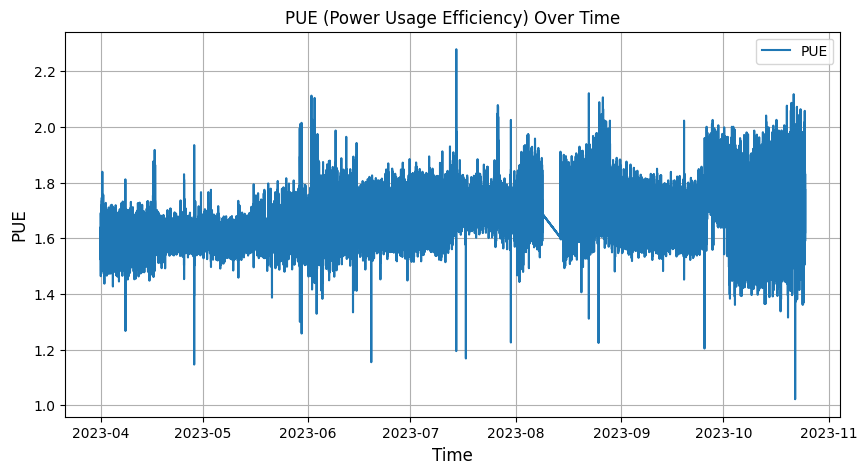

In [74]:
plt.figure(figsize=(10, 5))

plt.plot(FINAL_DF['Timestamp'],FINAL_DF['PUE'], label='PUE')

plt.title('PUE (Power Usage Efficiency) Over Time')
plt.xlabel('Time', fontsize=12)
plt.ylabel('PUE', fontsize=12)
plt.grid()

plt.legend()
plt.show()

## KS10.1

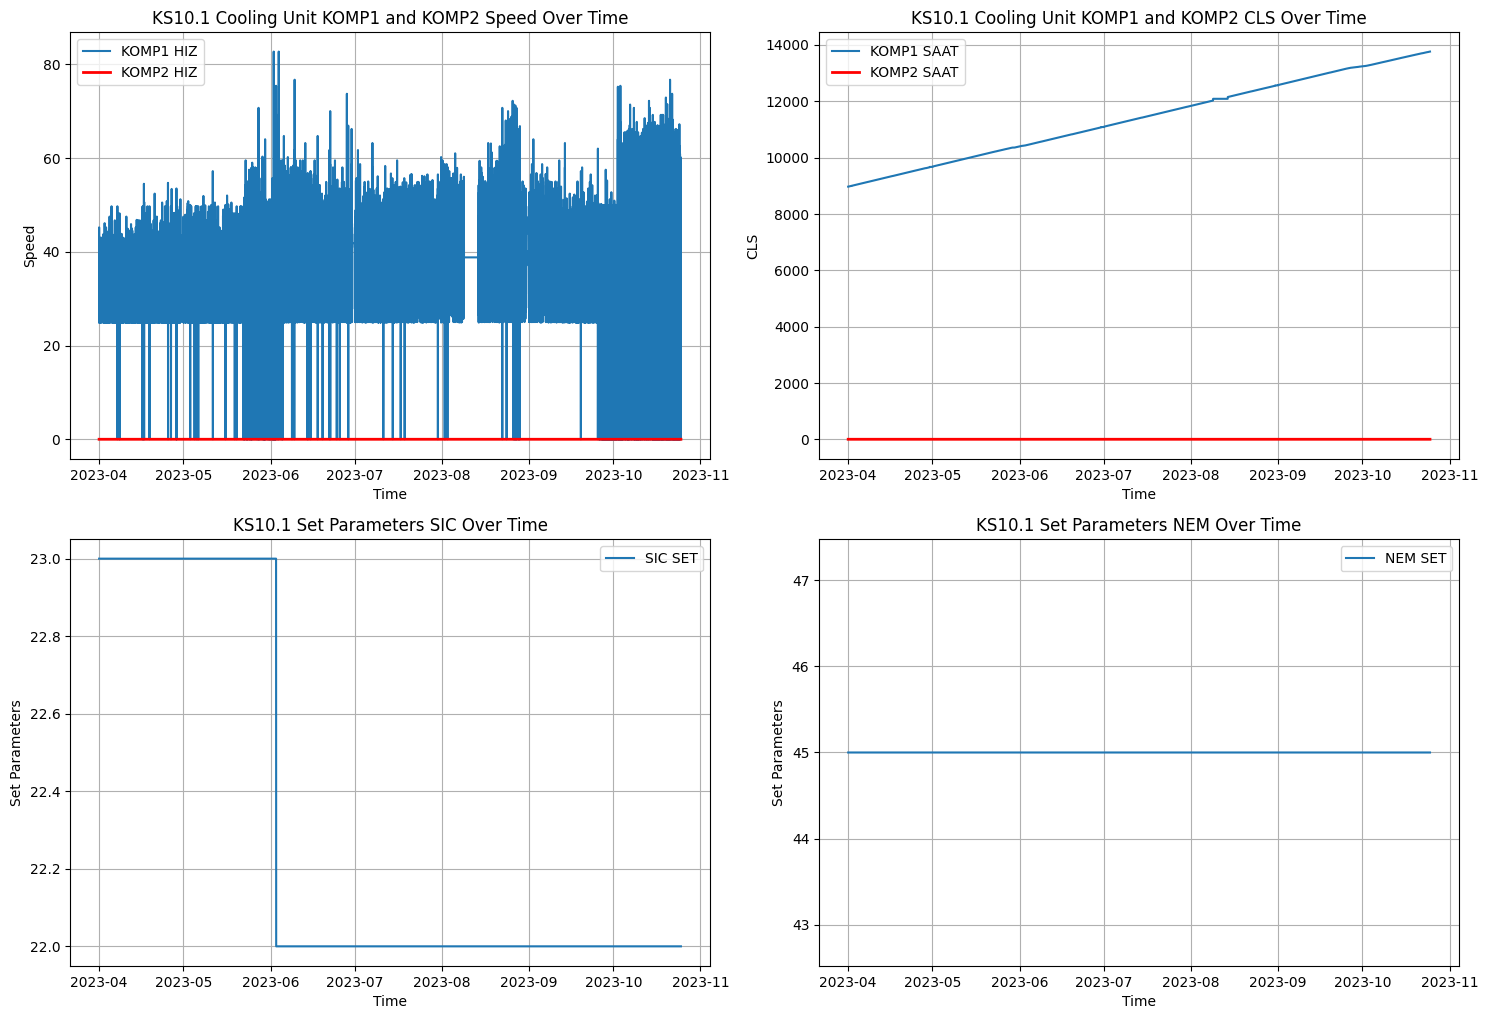

In [31]:
# plot everything about KS10.1 with subplots FOR EACH ROW FOR SUBPLOTS PLOT 2 GRAPHS
plt.figure(figsize=(15, 20))

# Subplot for KS10.1 Cooling Unit Speed for KOMP1
plt.subplot(4, 2, 1)
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['I_KOMP1_HIZ'], label='KOMP1 HIZ')
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['I_KOMP2_HIZ'], label='KOMP2 HIZ', color='r', linewidth=2)
plt.title('KS10.1 Cooling Unit KOMP1 and KOMP2 Speed Over Time')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.grid()
plt.legend()

# Subplot for KS10.1 Cooling Unit CLS for KOMP1
plt.subplot(4, 2, 2)
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['I_KOMP1_SAAT'], label='KOMP1 SAAT')
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['I_KOMP2_SAAT'], label='KOMP2 SAAT', color='r', linewidth=2)
plt.title('KS10.1 Cooling Unit KOMP1 and KOMP2 CLS Over Time')
plt.xlabel('Time')
plt.ylabel('CLS')
plt.grid()
plt.legend()

# Subplot for KS10.1 Cooling Unit Set Parameters SIC
plt.subplot(4, 2, 3)
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['I_SIC_SET'], label='SIC SET')
plt.title('KS10.1 Set Parameters SIC Over Time')
plt.xlabel('Time')
plt.ylabel('Set Parameters')
plt.grid()
plt.legend()

# Subplot for KS10.1 Cooling Unit Set Parameters NEM
plt.subplot(4, 2, 4)
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['I_NEM_SET'], label='NEM SET')
plt.title('KS10.1 Set Parameters NEM Over Time')
plt.xlabel('Time')
plt.ylabel('Set Parameters')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

## KS10.2

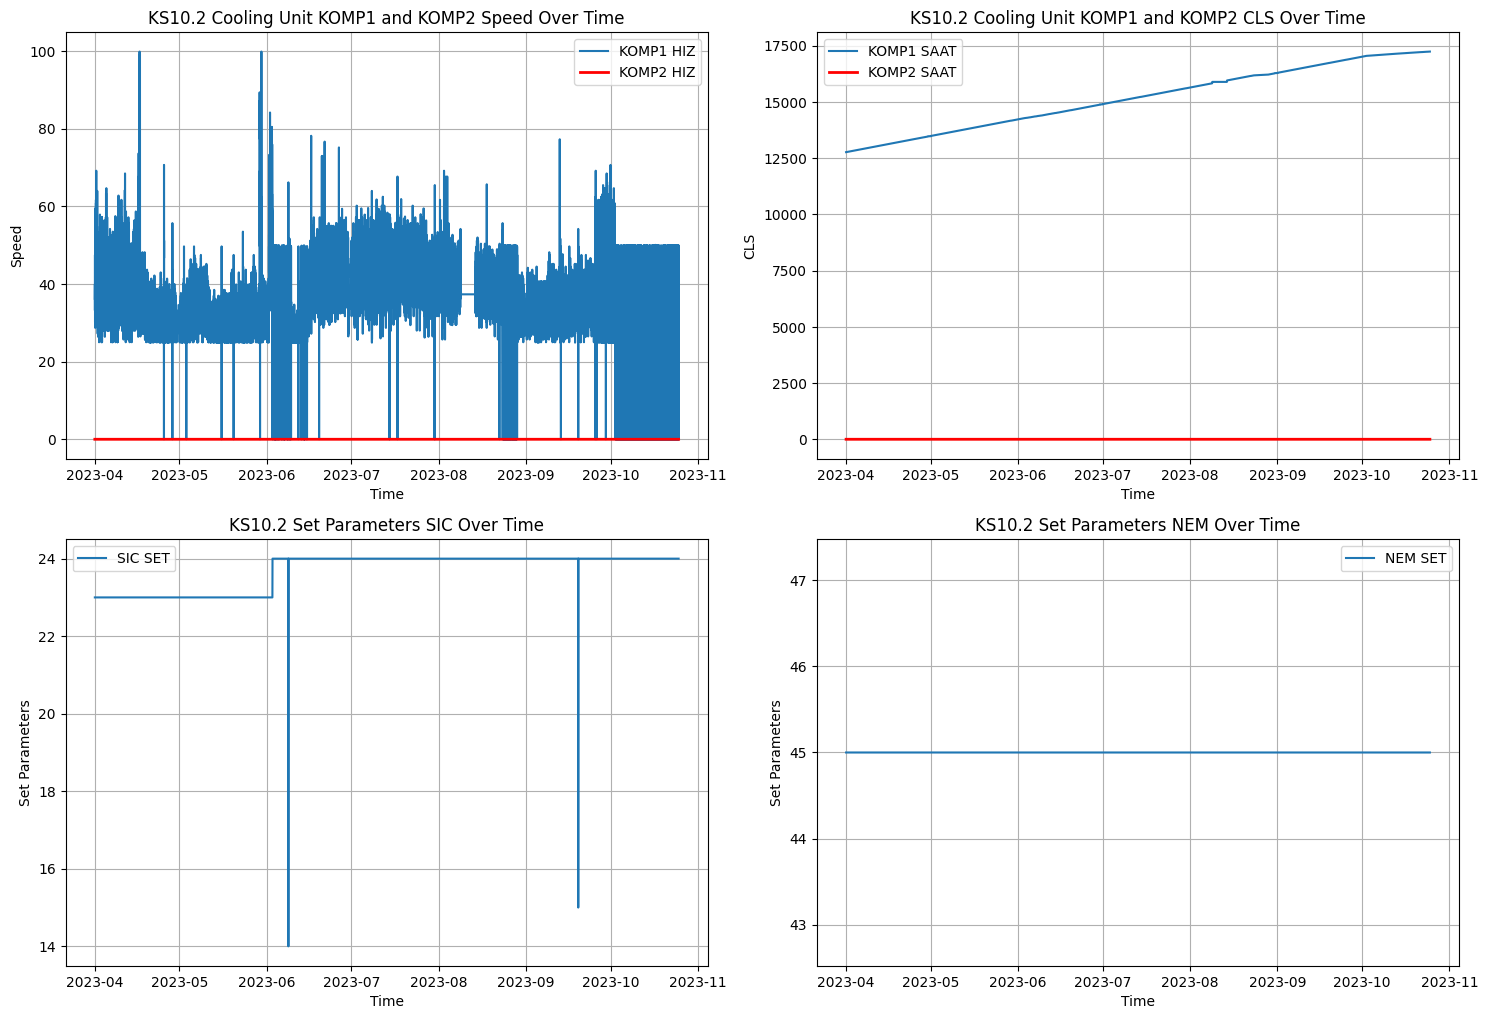

In [32]:
# plot everything about KS10.2 with subplots FOR EACH ROW FOR SUBPLOTS PLOT 2 GRAPHS
plt.figure(figsize=(15, 20))

# Subplot for KS10.1 Cooling Unit Speed for KOMP1
plt.subplot(4, 2, 1)
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['II_KOMP1_HIZ'], label='KOMP1 HIZ')
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['II_KOMP2_HIZ'], label='KOMP2 HIZ', color='r', linewidth=2)
plt.title('KS10.2 Cooling Unit KOMP1 and KOMP2 Speed Over Time')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.grid()
plt.legend()

# Subplot for KS10.1 Cooling Unit CLS for KOMP1
plt.subplot(4, 2, 2)
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['II_KOMP1_SAAT'], label='KOMP1 SAAT')
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['II_KOMP2_SAAT'], label='KOMP2 SAAT', color='r', linewidth=2)
plt.title('KS10.2 Cooling Unit KOMP1 and KOMP2 CLS Over Time')
plt.xlabel('Time')
plt.ylabel('CLS')
plt.grid()
plt.legend()

# Subplot for KS10.1 Cooling Unit Set Parameters SIC
plt.subplot(4, 2, 3)
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['II_SIC_SET'], label='SIC SET')
plt.title('KS10.2 Set Parameters SIC Over Time')
plt.xlabel('Time')
plt.ylabel('Set Parameters')
plt.grid()
plt.legend()

# Subplot for KS10.1 Cooling Unit Set Parameters NEM
plt.subplot(4, 2, 4)
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['II_NEM_SET'], label='NEM SET')
plt.title('KS10.2 Set Parameters NEM Over Time')
plt.xlabel('Time')
plt.ylabel('Set Parameters')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

## KS10.3

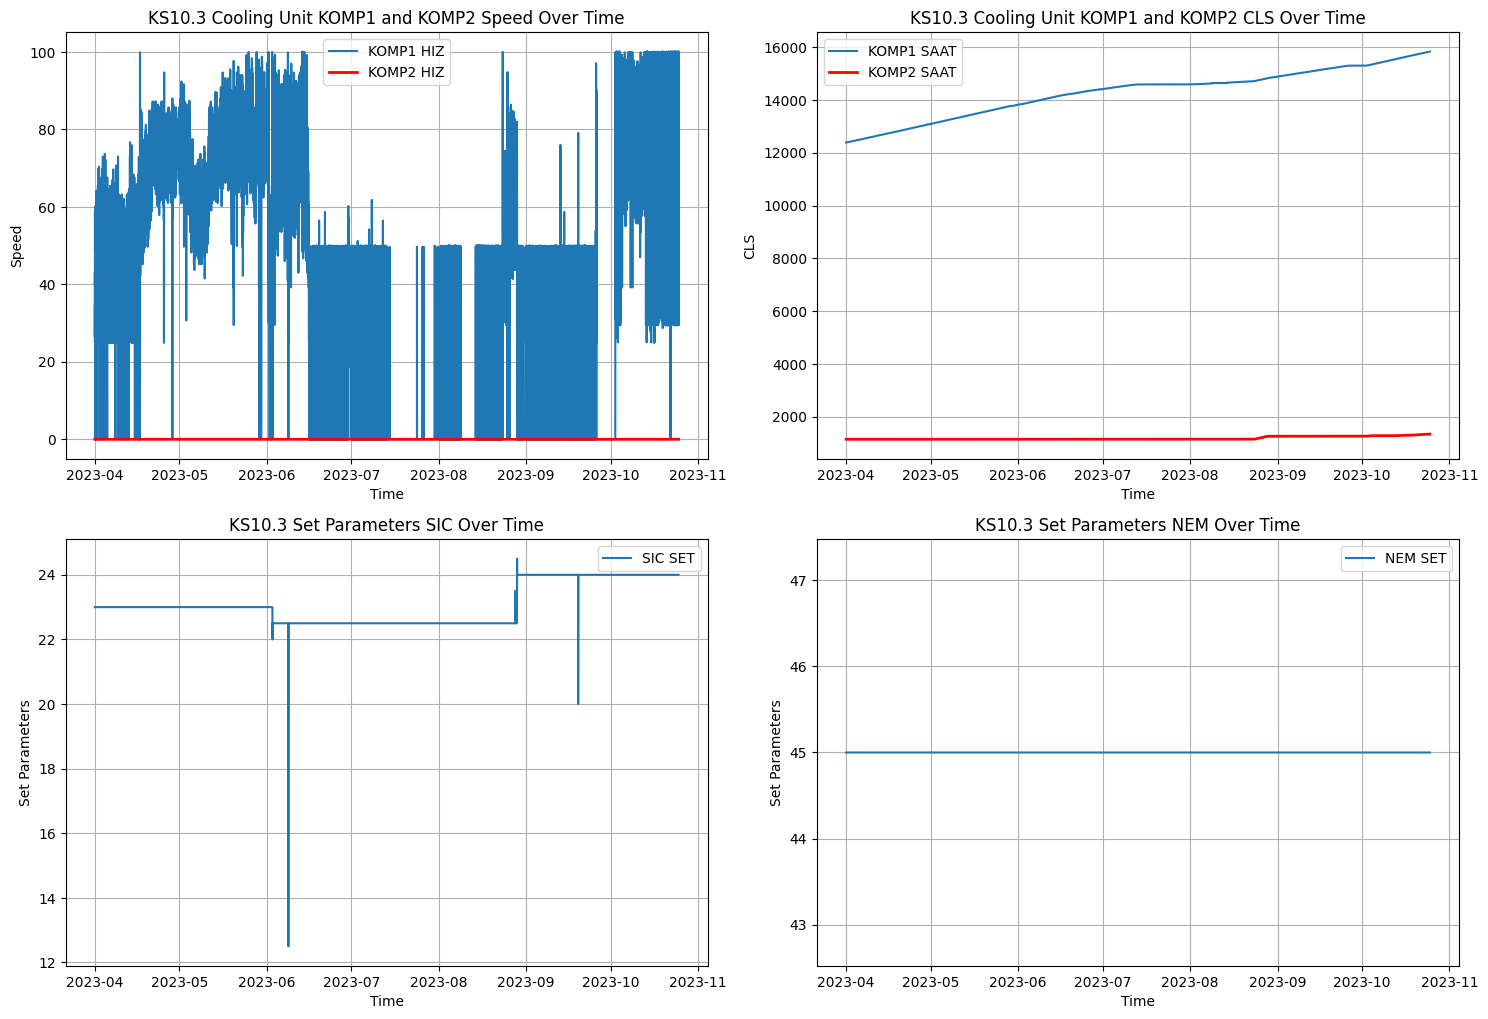

In [33]:
# plot everything about KS10.2 with subplots FOR EACH ROW FOR SUBPLOTS PLOT 2 GRAPHS
plt.figure(figsize=(15, 20))

# Subplot for KS10.1 Cooling Unit Speed for KOMP1
plt.subplot(4, 2, 1)
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['III_KOMP1_HIZ'], label='KOMP1 HIZ')
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['III_KOMP2_HIZ'], label='KOMP2 HIZ', color='r', linewidth=2)
plt.title('KS10.3 Cooling Unit KOMP1 and KOMP2 Speed Over Time')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.grid()
plt.legend()

# Subplot for KS10.1 Cooling Unit CLS for KOMP1
plt.subplot(4, 2, 2)
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['III_KOMP1_SAAT'], label='KOMP1 SAAT')
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['III_KOMP2_SAAT'], label='KOMP2 SAAT', color='r', linewidth=2)
plt.title('KS10.3 Cooling Unit KOMP1 and KOMP2 CLS Over Time')
plt.xlabel('Time')
plt.ylabel('CLS')
plt.grid()
plt.legend()

# Subplot for KS10.1 Cooling Unit Set Parameters SIC
plt.subplot(4, 2, 3)
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['III_SIC_SET'], label='SIC SET')
plt.title('KS10.3 Set Parameters SIC Over Time')
plt.xlabel('Time')
plt.ylabel('Set Parameters')
plt.grid()
plt.legend()

# Subplot for KS10.1 Cooling Unit Set Parameters NEM
plt.subplot(4, 2, 4)
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['III_NEM_SET'], label='NEM SET')
plt.title('KS10.3 Set Parameters NEM Over Time')
plt.xlabel('Time')
plt.ylabel('Set Parameters')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

## KS10.4

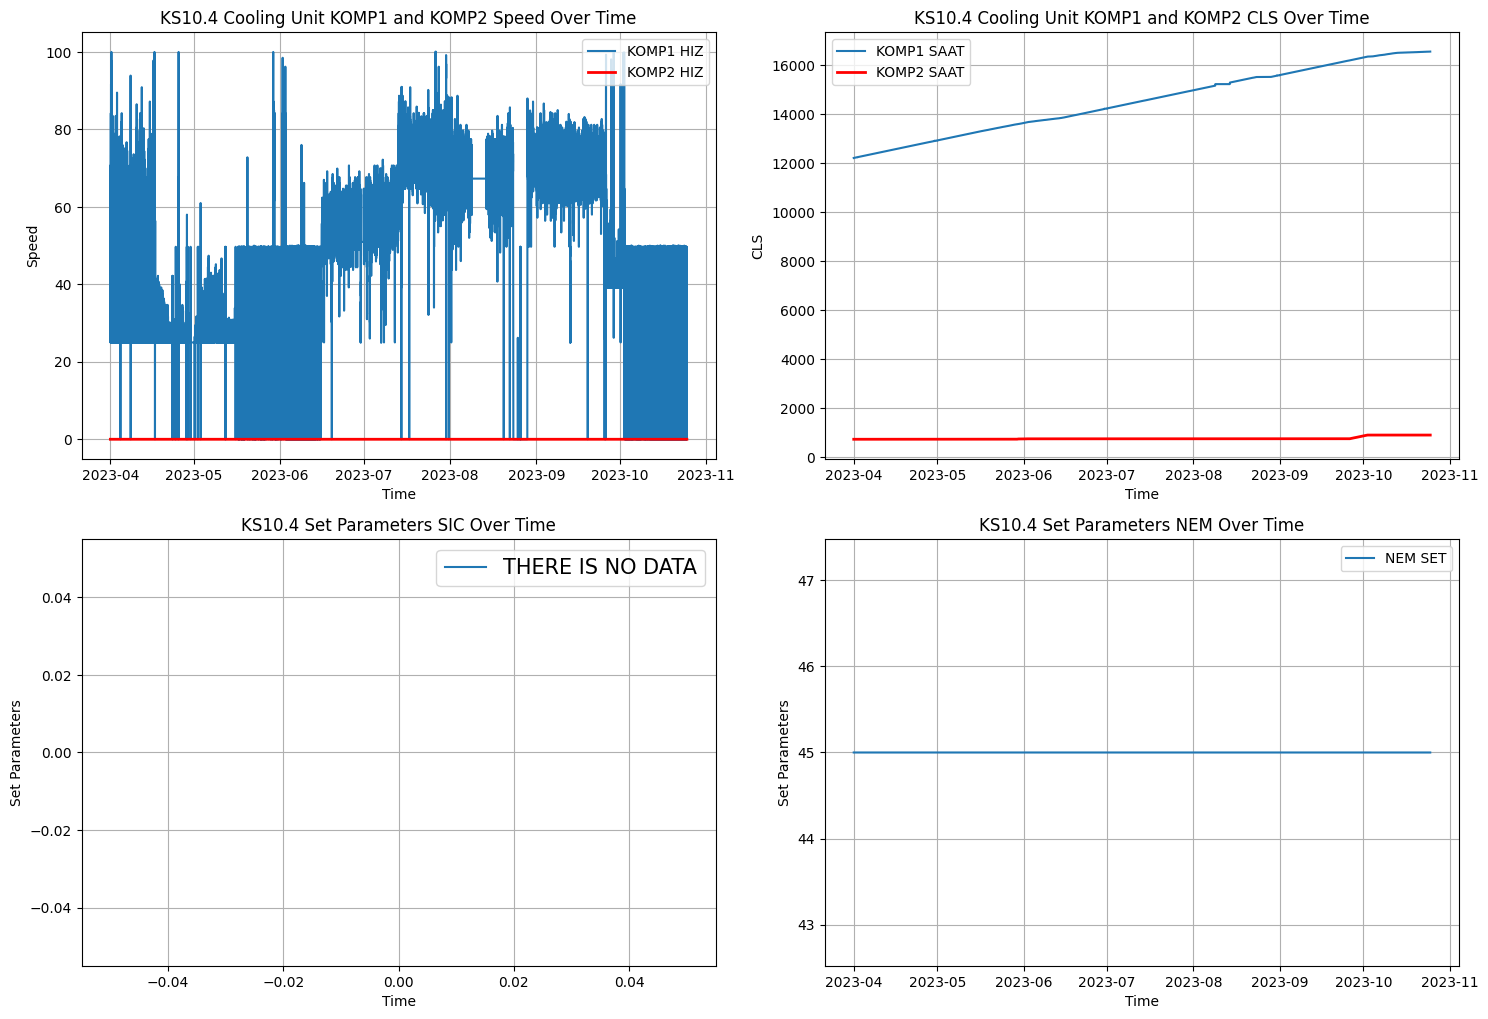

In [40]:
# plot everything about KS10.2 with subplots FOR EACH ROW FOR SUBPLOTS PLOT 2 GRAPHS
plt.figure(figsize=(15, 20))

# Subplot for KS10.1 Cooling Unit Speed for KOMP1
plt.subplot(4, 2, 1)
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['IV_KOMP1_HIZ'], label='KOMP1 HIZ')
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['IV_KOMP2_HIZ'], label='KOMP2 HIZ', color='r', linewidth=2)
plt.title('KS10.4 Cooling Unit KOMP1 and KOMP2 Speed Over Time')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.grid()
plt.legend()

# Subplot for KS10.1 Cooling Unit CLS for KOMP1
plt.subplot(4, 2, 2)
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['IV_KOMP1_SAAT'], label='KOMP1 SAAT')
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['IV_KOMP2_SAAT'], label='KOMP2 SAAT', color='r', linewidth=2)
plt.title('KS10.4 Cooling Unit KOMP1 and KOMP2 CLS Over Time')
plt.xlabel('Time')
plt.ylabel('CLS')
plt.grid()
plt.legend()

# Subplot for KS10.1 Cooling Unit Set Parameters SIC
# because there is no data for KS10.4 SIC SET write 'THERE IS NO DATA' in the plot
# do not plot anything
plt.subplot(4, 2, 3)
plt.plot([], [], label='THERE IS NO DATA')
plt.title('KS10.4 Set Parameters SIC Over Time')
plt.xlabel('Time')
plt.ylabel('Set Parameters')
plt.grid()
plt.legend(fontsize=15)

# Subplot for KS10.1 Cooling Unit Set Parameters NEM
plt.subplot(4, 2, 4)
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['IV_NEM_SET'], label='NEM SET')
plt.title('KS10.4 Set Parameters NEM Over Time')
plt.xlabel('Time')
plt.ylabel('Set Parameters')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

## CHILLER PLOT

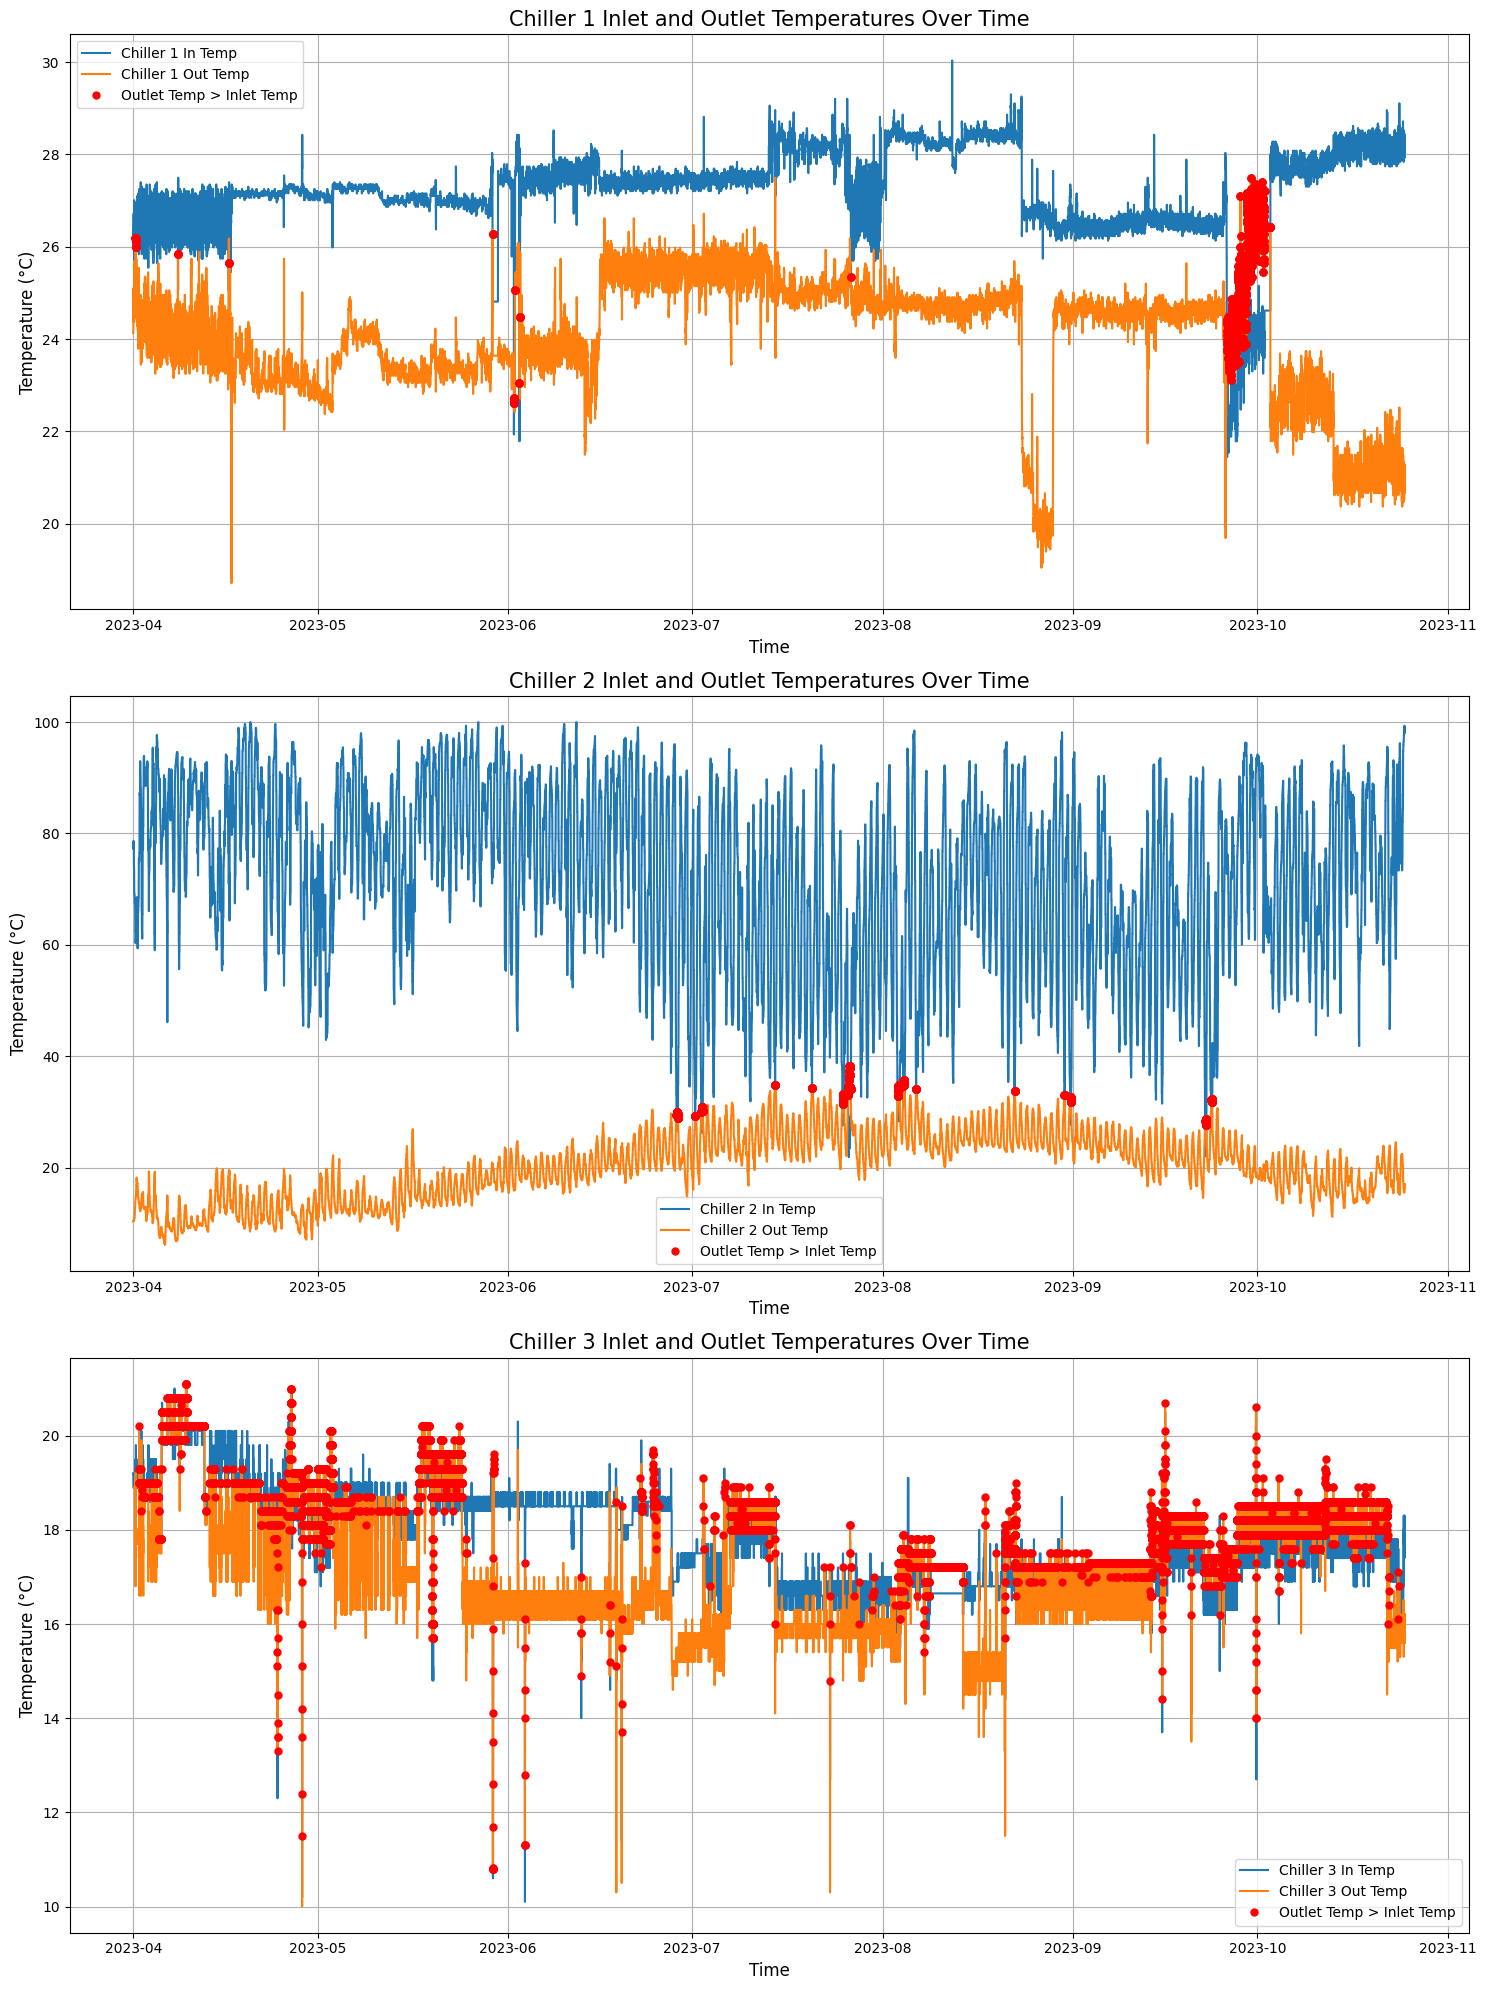

In [67]:
# plot everything about CHILLER with subplots in one col
plt.figure(figsize=(15, 20))

# Subplot for Chiller 1 Temperatures
plt.subplot(3, 1, 1)
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['CH1_GIRIS_SIC'], label='Chiller 1 In Temp')
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['CH1_CIKIS_SIC'], label='Chiller 1 Out Temp')
# plot a dot where inlet temperature is higher than outlet temperature
plt.plot(FINAL_DF.loc[FINAL_DF['CH1_GIRIS_SIC'] < FINAL_DF['CH1_CIKIS_SIC'], 'Timestamp'], 
         FINAL_DF.loc[FINAL_DF['CH1_GIRIS_SIC'] < FINAL_DF['CH1_CIKIS_SIC'], 'CH1_CIKIS_SIC'], 
         'ro', label='Outlet Temp > Inlet Temp', ms=5)

plt.title('Chiller 1 Inlet and Outlet Temperatures Over Time', fontsize=15)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.grid()
plt.legend()

# Subplot for Chiller 2 Temperatures
plt.subplot(3, 1, 2)
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['CH2_GIRIS_SIC'], label='Chiller 2 In Temp')
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['CH2_CIKIS_SIC'], label='Chiller 2 Out Temp')
# plot a dot where inlet temperature is higher than outlet temperature
plt.plot(FINAL_DF.loc[FINAL_DF['CH2_GIRIS_SIC'] < FINAL_DF['CH2_CIKIS_SIC'], 'Timestamp'], 
         FINAL_DF.loc[FINAL_DF['CH2_GIRIS_SIC'] < FINAL_DF['CH2_CIKIS_SIC'], 'CH2_CIKIS_SIC'], 
         'ro', label='Outlet Temp > Inlet Temp', ms=5)
plt.title('Chiller 2 Inlet and Outlet Temperatures Over Time', fontsize=15)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.grid()
plt.legend()

# Subplot for Chiller 3 Temperatures
plt.subplot(3, 1, 3)
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['CH3_GIRIS_SIC'], label='Chiller 3 In Temp')
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['CH3_CIKIS_SIC'], label='Chiller 3 Out Temp')
# plot a dot where inlet temperature is higher than outlet temperature
plt.plot(FINAL_DF.loc[FINAL_DF['CH3_GIRIS_SIC'] < FINAL_DF['CH3_CIKIS_SIC'], 'Timestamp'], 
         FINAL_DF.loc[FINAL_DF['CH3_GIRIS_SIC'] < FINAL_DF['CH3_CIKIS_SIC'], 'CH3_CIKIS_SIC'], 
         'ro', label='Outlet Temp > Inlet Temp', ms=5)
plt.title('Chiller 3 Inlet and Outlet Temperatures Over Time', fontsize=15)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

## SENSOR PLOT

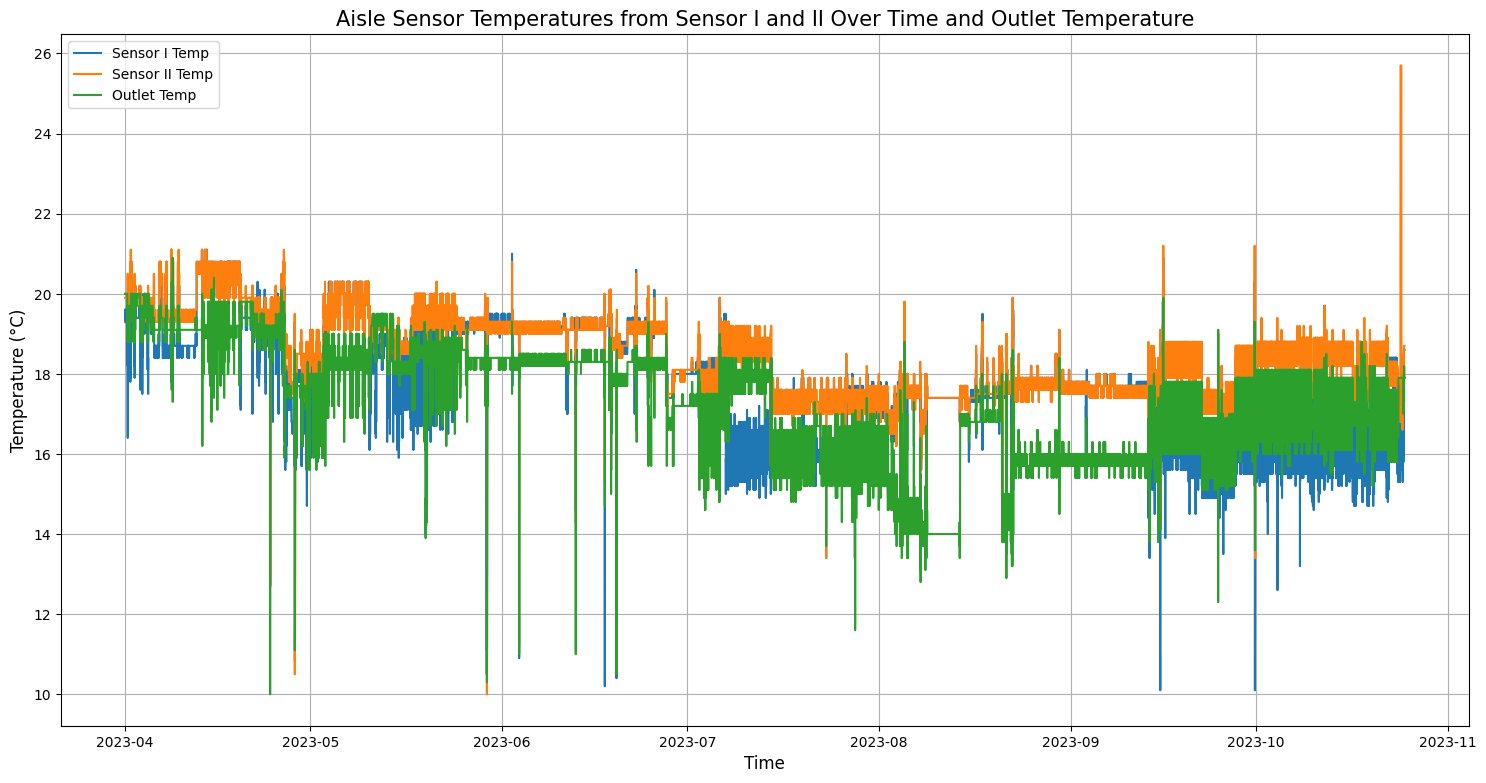

In [73]:
# plot everything about SENSOR with subplots in one col
plt.figure(figsize=(15, 15))

# Subplot for Sensor 1 and 2 Temperatures
plt.subplot(2, 1, 1)
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['SENSOR_I_TEMP'], label='Sensor I Temp')
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['SENSOR_II_TEMP'], label='Sensor II Temp')
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['OUTLET_TEMP'], label='Outlet Temp')
plt.title('Aisle Sensor Temperatures from Sensor I and II Over Time and Outlet Temperature', fontsize=15)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

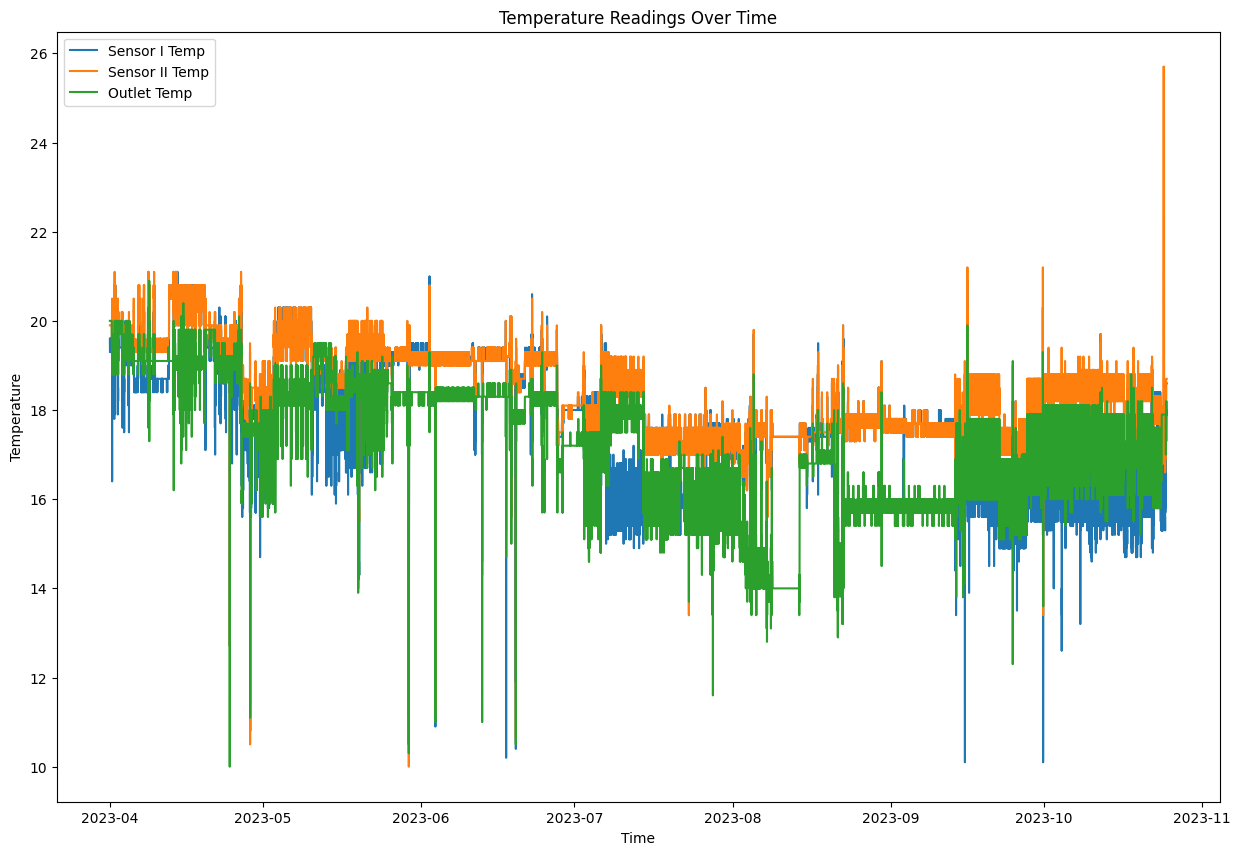

In [8]:
plt.figure(figsize=(15, 10))

plt.plot(FINAL_DF['Timestamp'],FINAL_DF['SENSOR_I_TEMP'], label='Sensor I Temp')
plt.plot(FINAL_DF['Timestamp'],FINAL_DF['SENSOR_II_TEMP'], label='Sensor II Temp')
plt.plot(FINAL_DF['Timestamp'],FINAL_DF['OUTLET_TEMP'], label='Outlet Temp')

plt.title('Temperature Readings Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')

plt.legend()
plt.show()

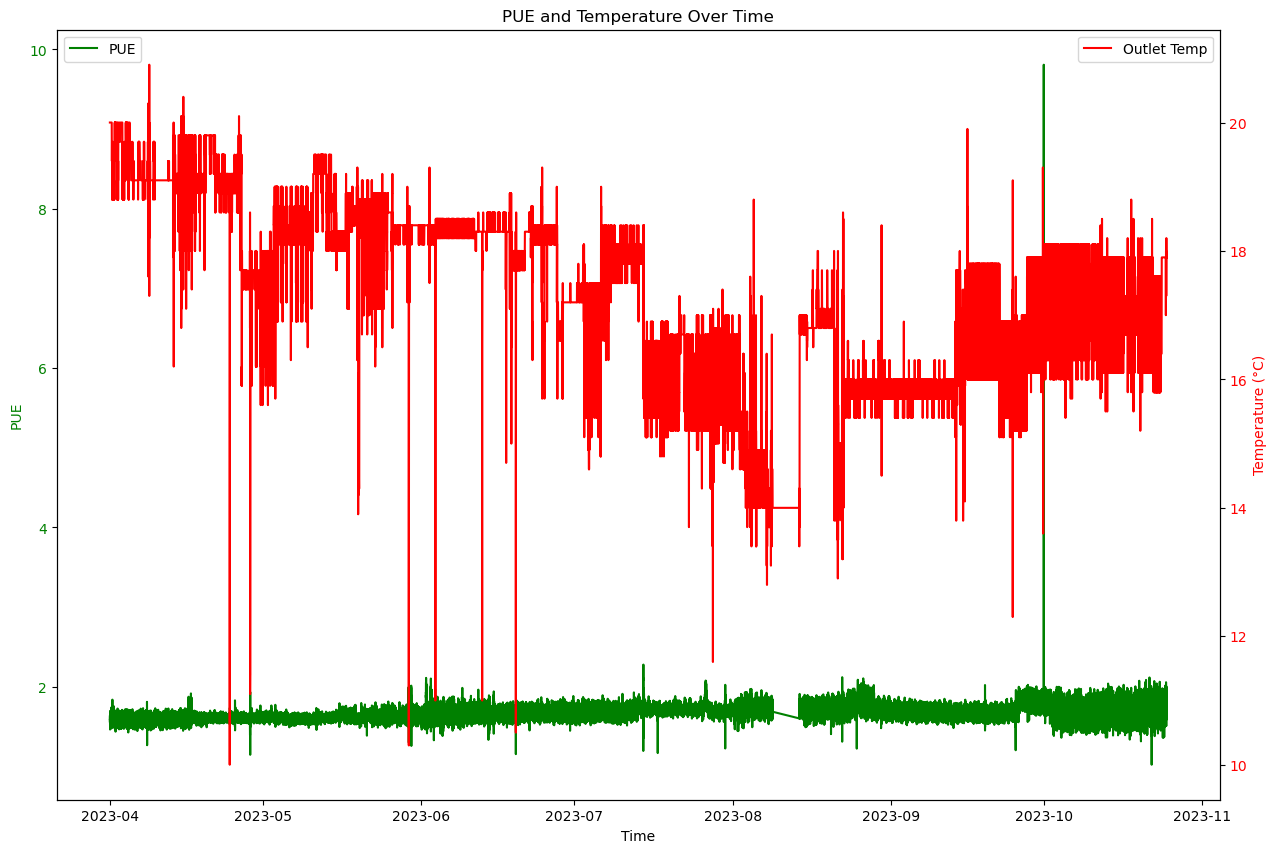

In [103]:
plt.figure(figsize=(15, 10))
ax1 = plt.gca() 
ax2 = ax1.twinx()  

ax1.plot(FINAL_DF['Timestamp'], FINAL_DF['PUE'], label='PUE', color='g')
ax1.set_xlabel('Time')
ax1.set_ylabel('PUE', color='g')
ax1.tick_params(axis='y', labelcolor='g')
ax2.plot(FINAL_DF['Timestamp'], FINAL_DF['OUTLET_TEMP'], label='Outlet Temp', color='r')
ax2.set_ylabel('Temperature (°C)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('PUE and Temperature Over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

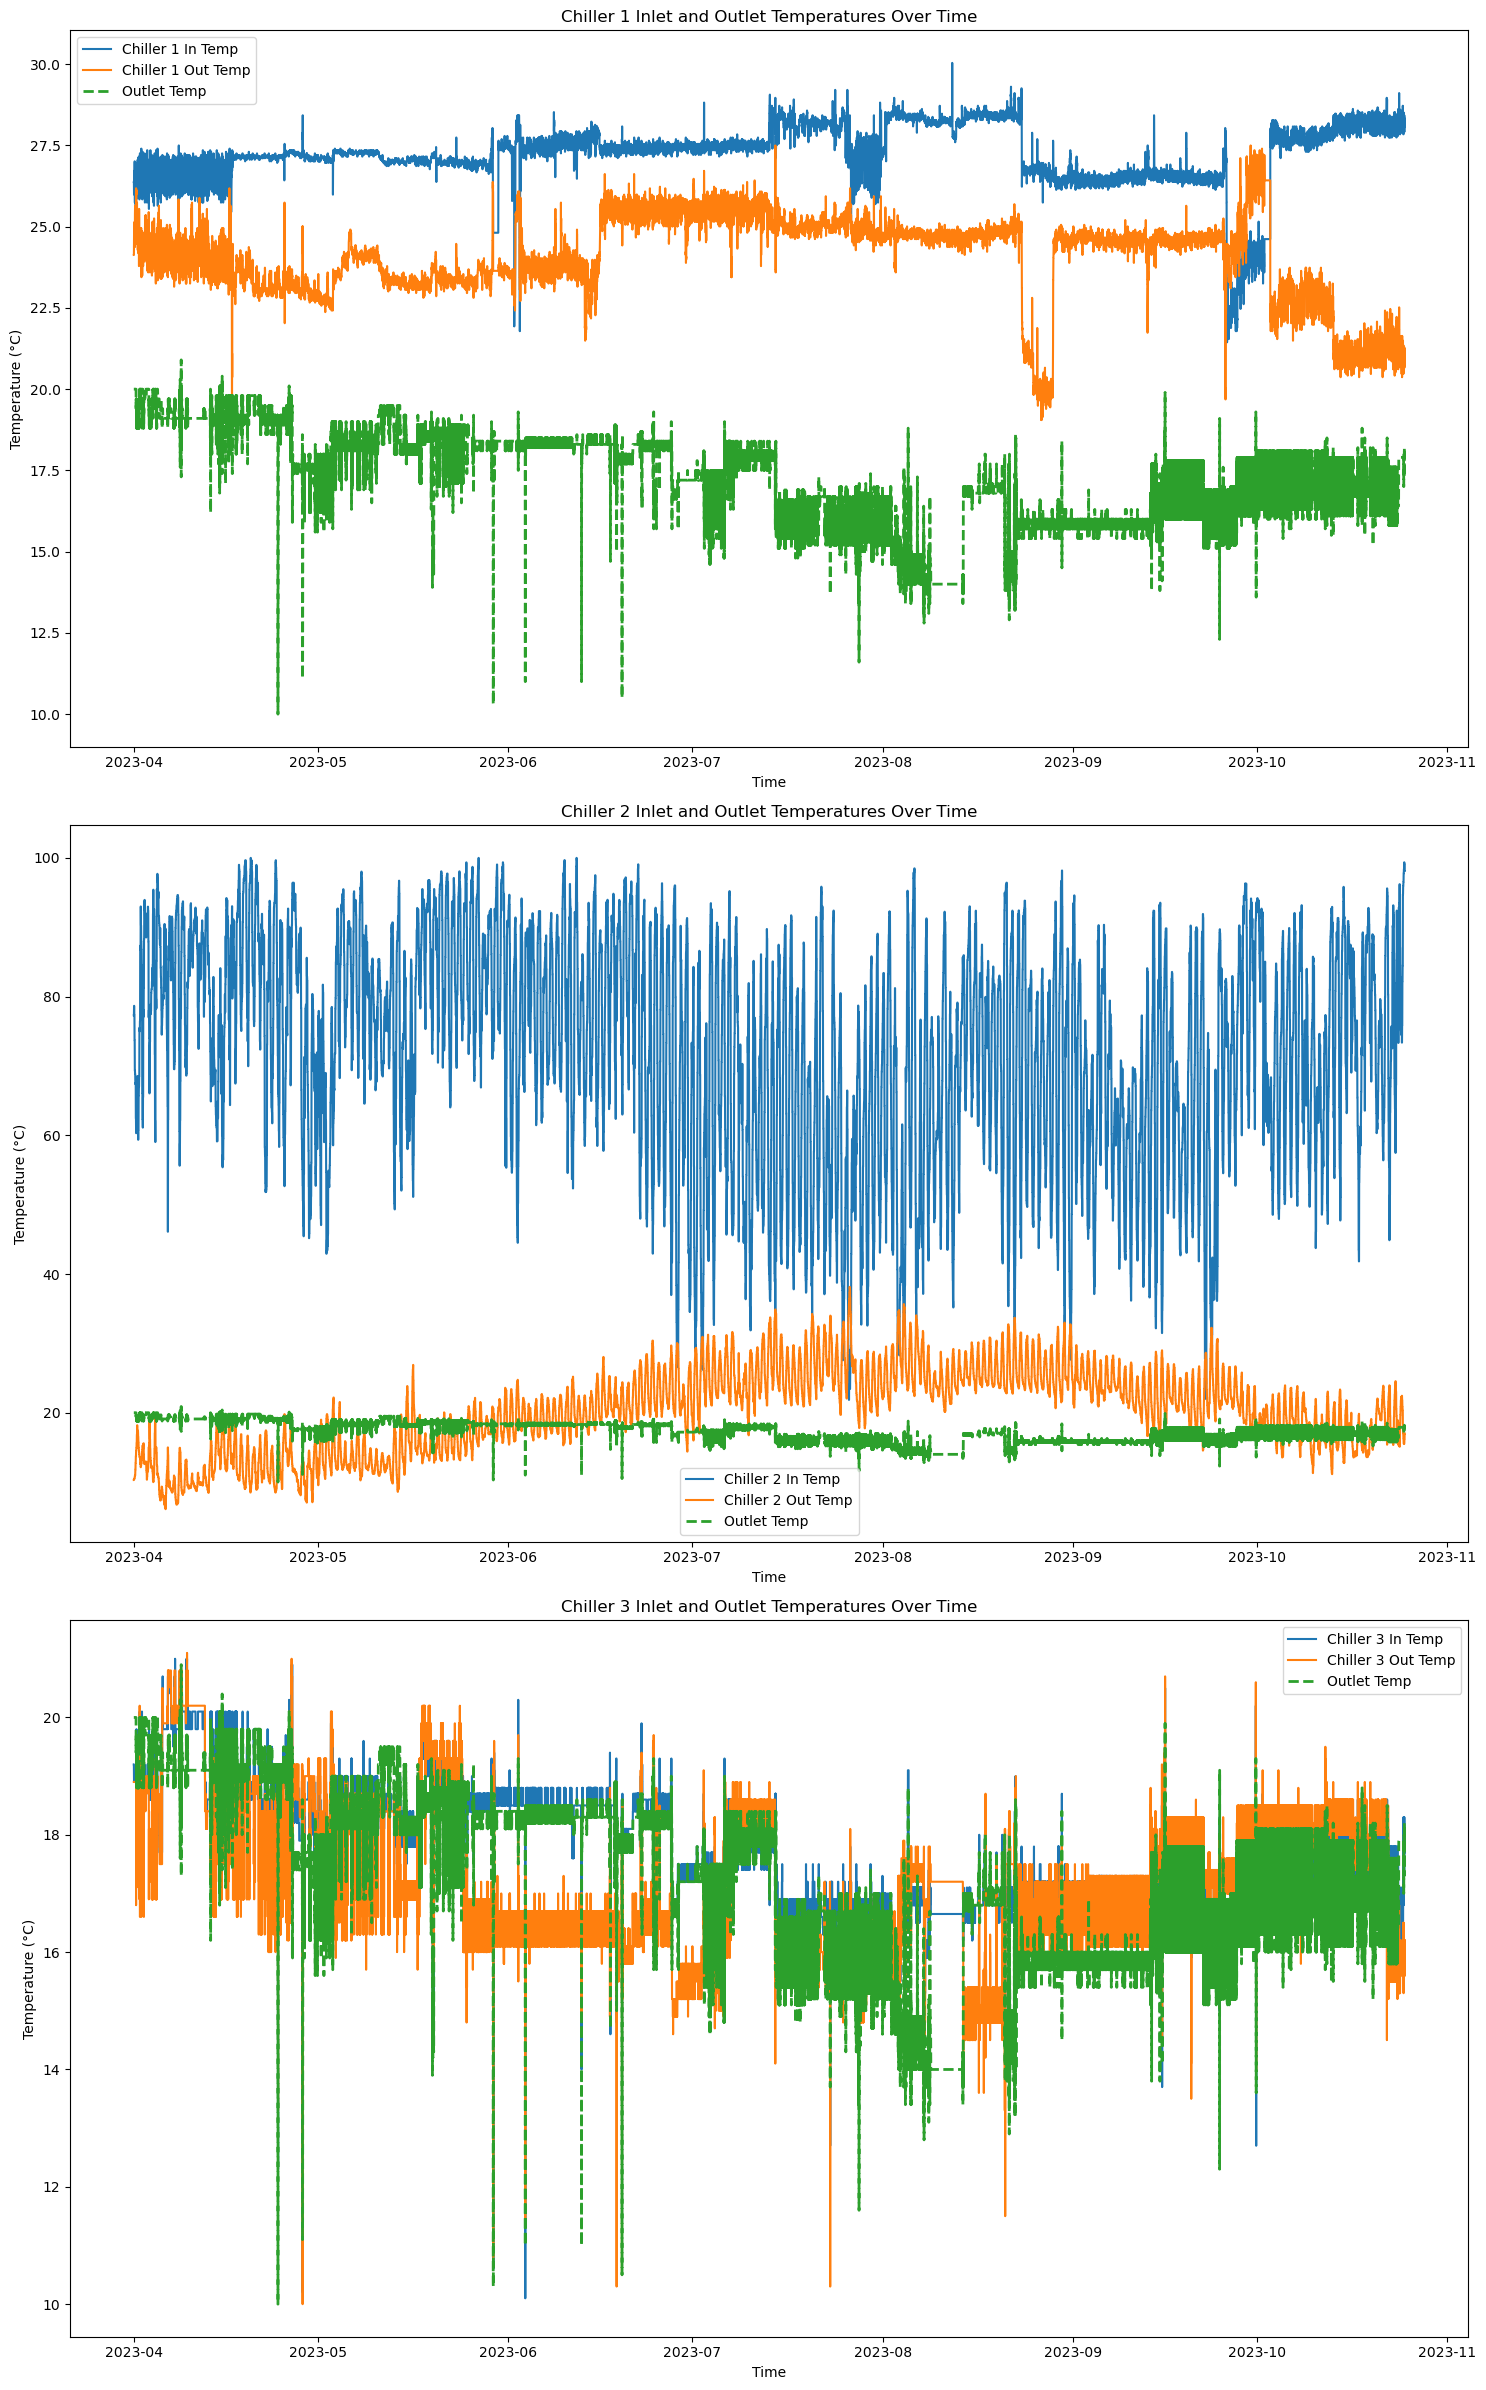

In [107]:
plt.figure(figsize=(15, 24))  

# Subplot for Chiller 1 Temperatures
plt.subplot(3, 1, 1) 
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['CH1_GIRIS_SIC'], label='Chiller 1 In Temp')
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['CH1_CIKIS_SIC'], label='Chiller 1 Out Temp')
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['OUTLET_TEMP'], label='Outlet Temp', linewidth=2, linestyle='--')
plt.title('Chiller 1 Inlet and Outlet Temperatures Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()

# Subplot for Chiller 2 Temperatures
plt.subplot(3, 1, 2) 
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['CH2_GIRIS_SIC'], label='Chiller 2 In Temp')
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['CH2_CIKIS_SIC'], label='Chiller 2 Out Temp')
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['OUTLET_TEMP'], label='Outlet Temp', linewidth=2, linestyle='--')
plt.title('Chiller 2 Inlet and Outlet Temperatures Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()

# Subplot for Chiller 3 Temperatures
plt.subplot(3, 1, 3)  
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['CH3_GIRIS_SIC'], label='Chiller 3 In Temp')
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['CH3_CIKIS_SIC'], label='Chiller 3 Out Temp')
plt.plot(FINAL_DF['Timestamp'], FINAL_DF['OUTLET_TEMP'], label='Outlet Temp', linewidth=2, linestyle='--')
plt.title('Chiller 3 Inlet and Outlet Temperatures Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.show()

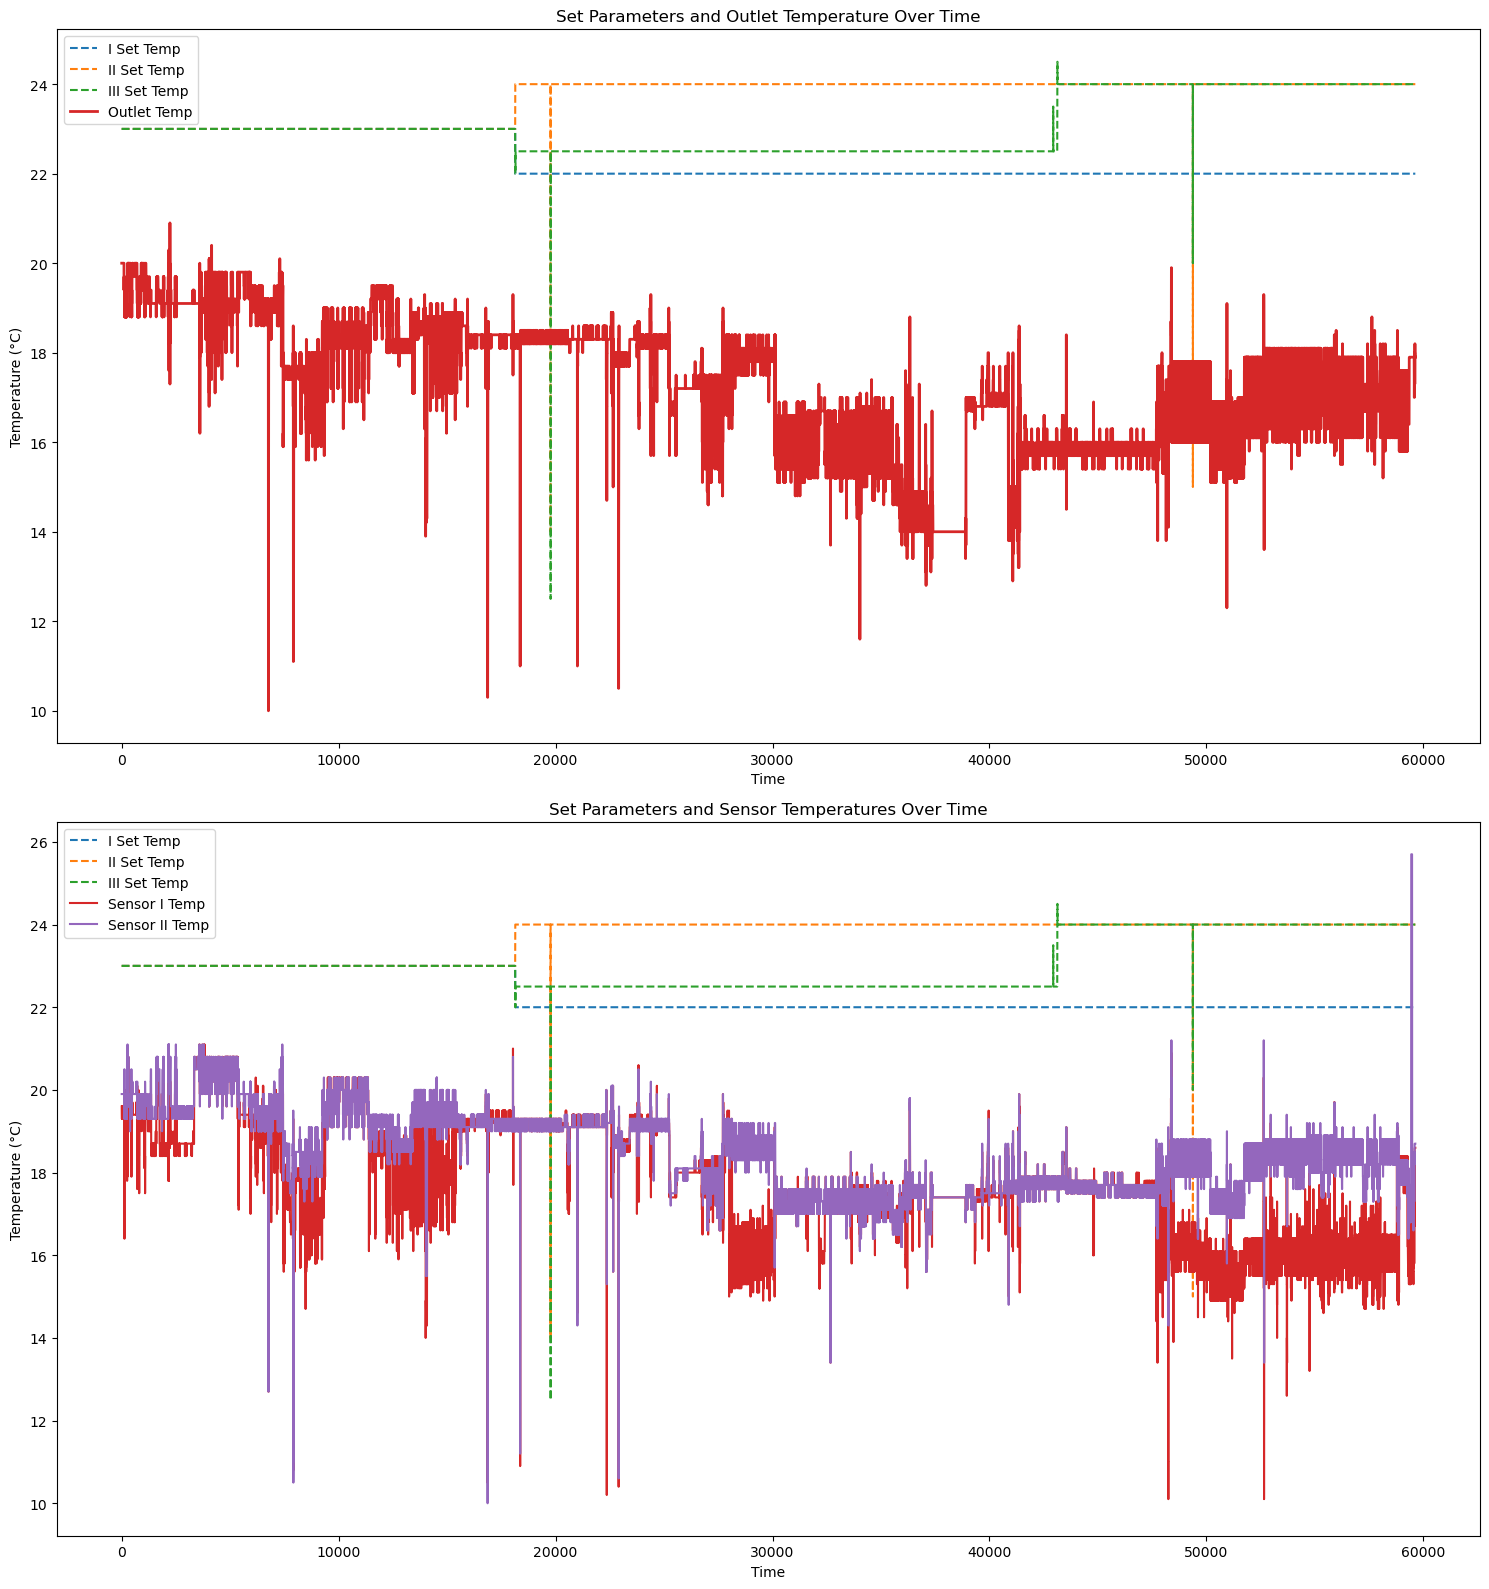

In [108]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 16))

ax1.plot(FINAL_DF['I_SIC_SET'], label='I Set Temp', linestyle='--')
ax1.plot(FINAL_DF['II_SIC_SET'], label='II Set Temp', linestyle='--')
ax1.plot(FINAL_DF['III_SIC_SET'], label='III Set Temp', linestyle='--')
ax1.plot(FINAL_DF['OUTLET_TEMP'], label='Outlet Temp', linewidth=2)
ax1.set_title('Set Parameters and Outlet Temperature Over Time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature (°C)')
ax1.legend()

ax2.plot(FINAL_DF['I_SIC_SET'], label='I Set Temp', linestyle='--')
ax2.plot(FINAL_DF['II_SIC_SET'], label='II Set Temp', linestyle='--')
ax2.plot(FINAL_DF['III_SIC_SET'], label='III Set Temp', linestyle='--')
ax2.plot(FINAL_DF['SENSOR_I_TEMP'], label='Sensor I Temp')
ax2.plot(FINAL_DF['SENSOR_II_TEMP'], label='Sensor II Temp')
ax2.set_title('Set Parameters and Sensor Temperatures Over Time')
ax2.set_xlabel('Time')
ax2.set_ylabel('Temperature (°C)')
ax2.legend()

plt.tight_layout()
plt.show()

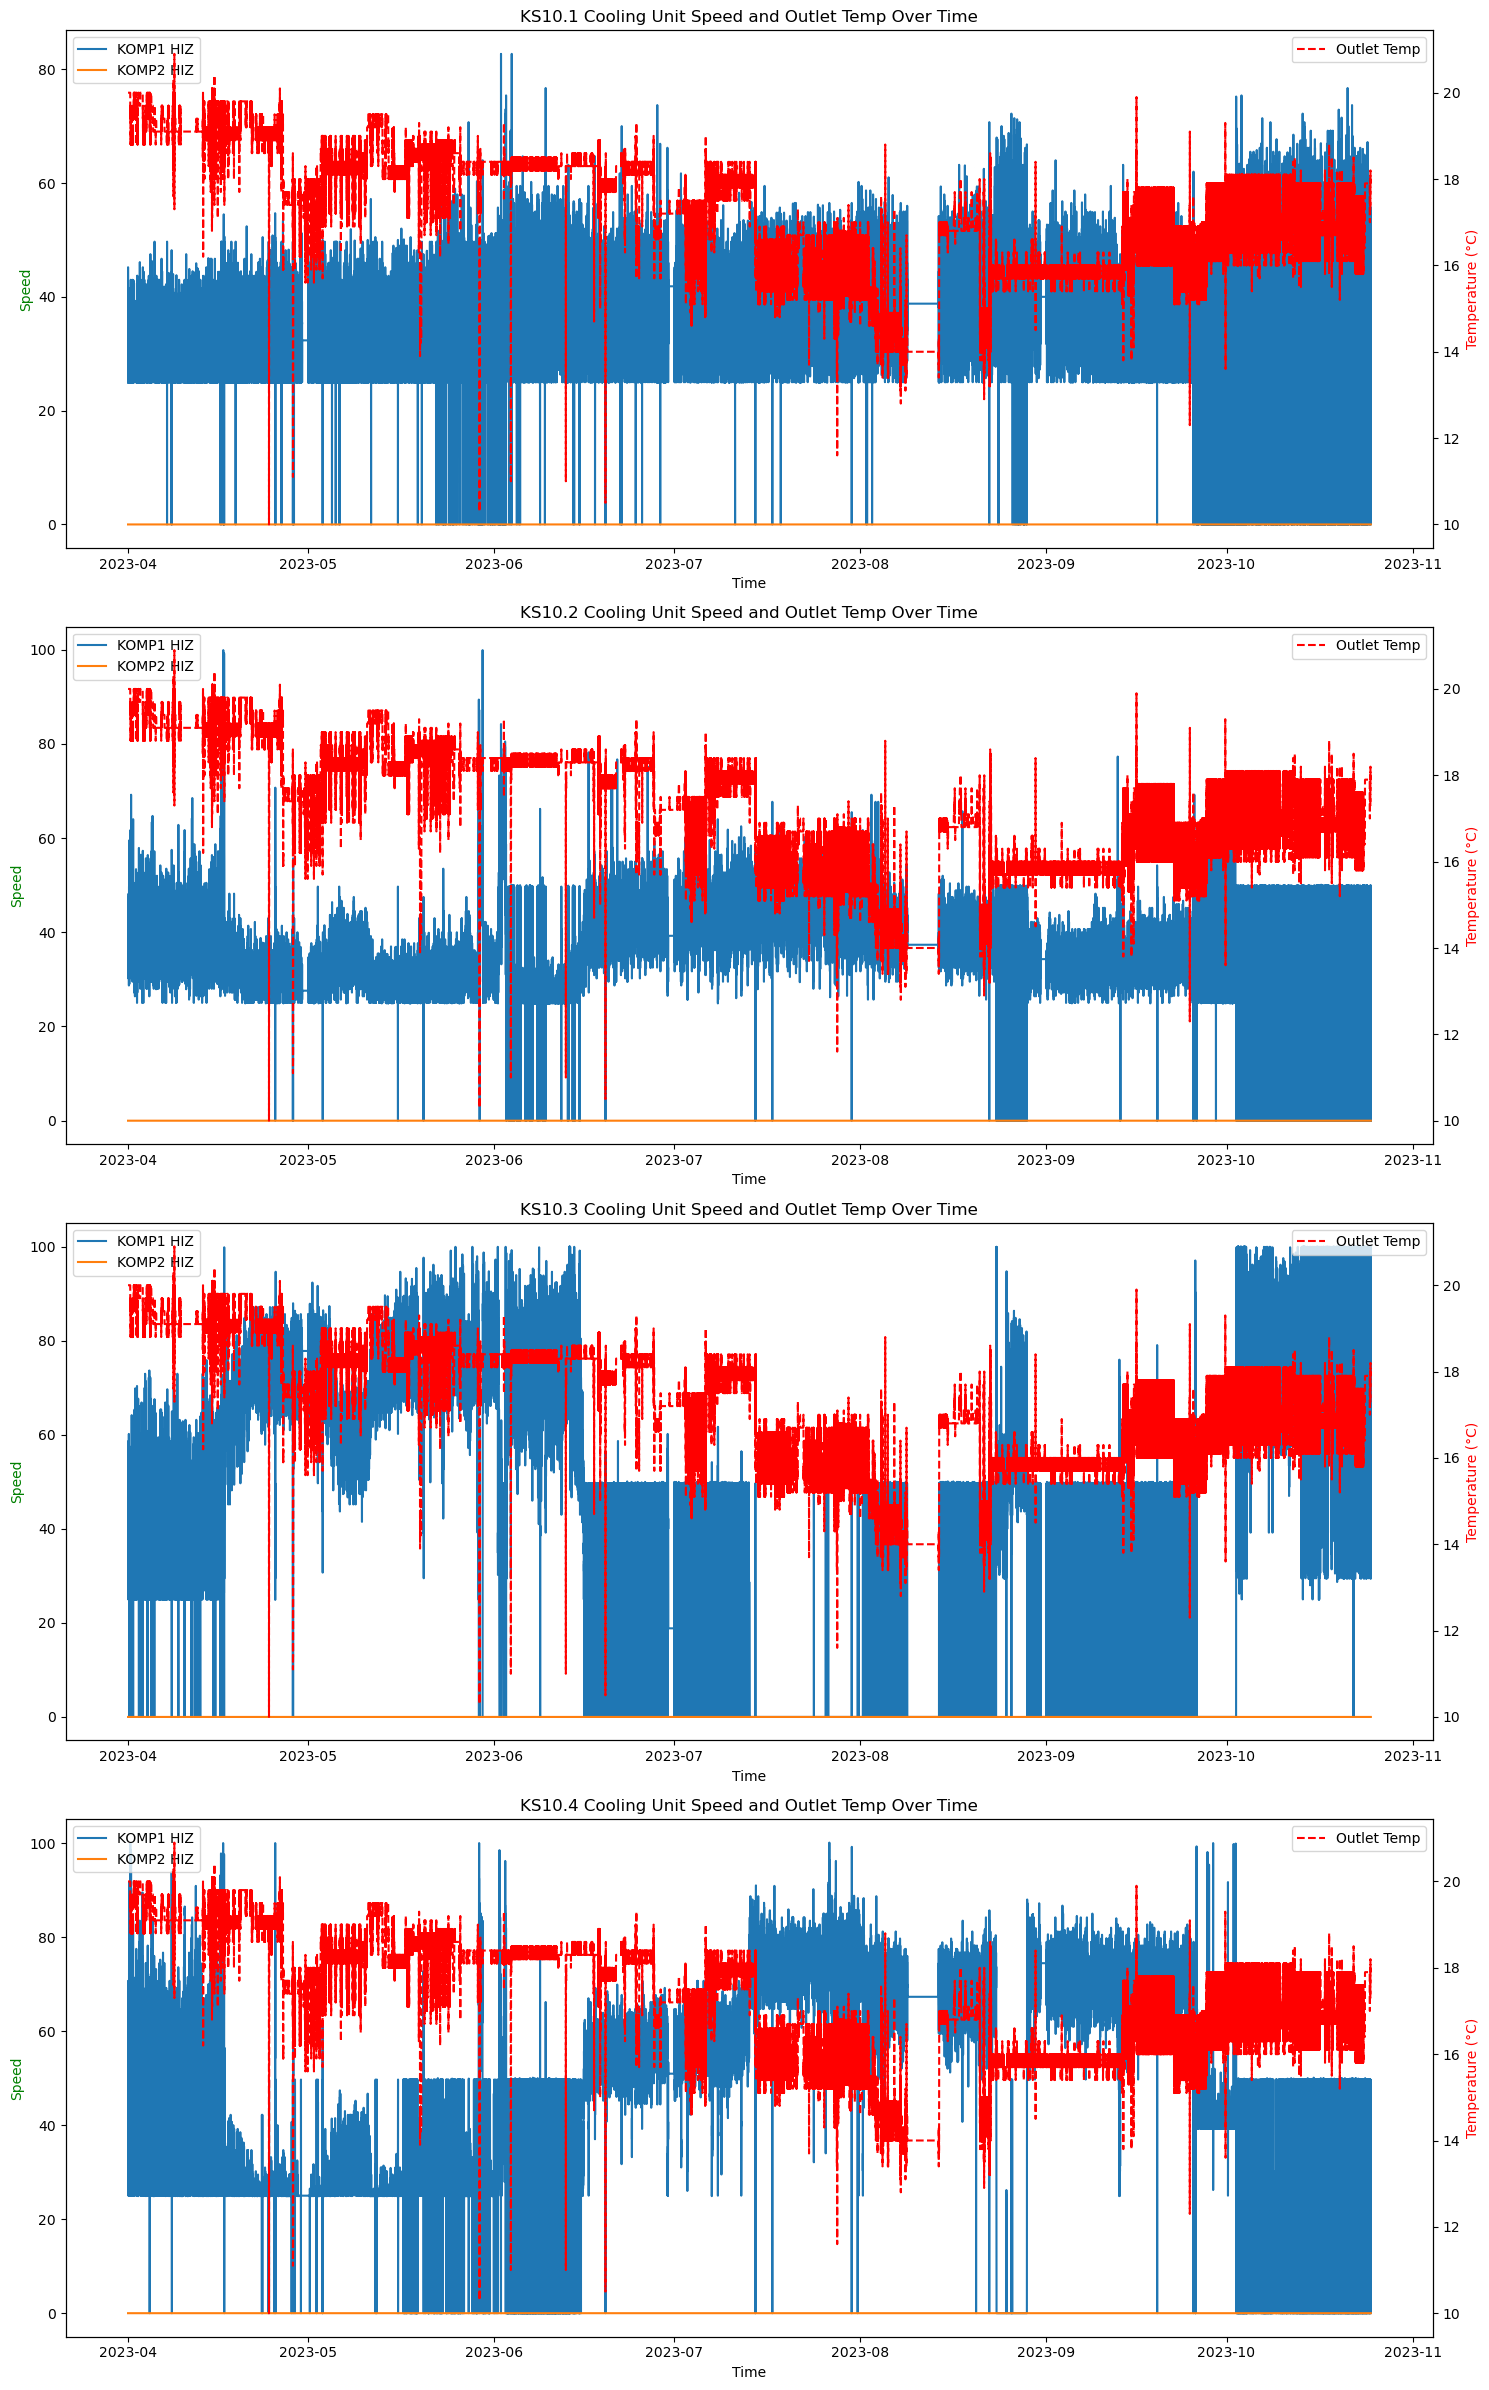

In [109]:
plt.figure(figsize=(15, 24))  

ax1_1 = plt.subplot(4, 1, 1)
ax2_1 = ax1_1.twinx()
ax1_1.plot(FINAL_DF['Timestamp'], FINAL_DF['I_KOMP1_HIZ'], label='KOMP1 HIZ')
ax1_1.plot(FINAL_DF['Timestamp'], FINAL_DF['I_KOMP2_HIZ'], label='KOMP2 HIZ')
ax2_1.plot(FINAL_DF['Timestamp'], FINAL_DF['OUTLET_TEMP'], label='Outlet Temp', linestyle='--', color='r')
ax1_1.set_title('KS10.1 Cooling Unit Speed and Outlet Temp Over Time')
ax1_1.set_xlabel('Time')
ax1_1.set_ylabel('Speed', color='g')
ax2_1.set_ylabel('Temperature (°C)', color='r')
ax1_1.legend(loc='upper left')
ax2_1.legend(loc='upper right')

# KS10.2 Cooling Unit Speed and Outlet Temp Over Time
ax1_2 = plt.subplot(4, 1, 2)
ax2_2 = ax1_2.twinx()
ax1_2.plot(FINAL_DF['Timestamp'], FINAL_DF['II_KOMP1_HIZ'], label='KOMP1 HIZ')
ax1_2.plot(FINAL_DF['Timestamp'], FINAL_DF['II_KOMP2_HIZ'], label='KOMP2 HIZ')
ax2_2.plot(FINAL_DF['Timestamp'], FINAL_DF['OUTLET_TEMP'], label='Outlet Temp', linestyle='--', color='r')
ax1_2.set_title('KS10.2 Cooling Unit Speed and Outlet Temp Over Time')
ax1_2.set_xlabel('Time')
ax1_2.set_ylabel('Speed', color='g')
ax2_2.set_ylabel('Temperature (°C)', color='r')
ax1_2.legend(loc='upper left')
ax2_2.legend(loc='upper right')

# KS10.3 Cooling Unit Speed and Outlet Temp Over Time
ax1_3 = plt.subplot(4, 1, 3)
ax2_3 = ax1_3.twinx()
ax1_3.plot(FINAL_DF['Timestamp'], FINAL_DF['III_KOMP1_HIZ'], label='KOMP1 HIZ')
ax1_3.plot(FINAL_DF['Timestamp'], FINAL_DF['III_KOMP2_HIZ'], label='KOMP2 HIZ')
ax2_3.plot(FINAL_DF['Timestamp'], FINAL_DF['OUTLET_TEMP'], label='Outlet Temp', linestyle='--', color='r')
ax1_3.set_title('KS10.3 Cooling Unit Speed and Outlet Temp Over Time')
ax1_3.set_xlabel('Time')
ax1_3.set_ylabel('Speed', color='g')
ax2_3.set_ylabel('Temperature (°C)', color='r')
ax1_3.legend(loc='upper left')
ax2_3.legend(loc='upper right')

# KS10.4 Cooling Unit Speed and Outlet Temp Over Time
ax1_4 = plt.subplot(4, 1, 4)
ax2_4 = ax1_4.twinx()
ax1_4.plot(FINAL_DF['Timestamp'], FINAL_DF['IV_KOMP1_HIZ'], label='KOMP1 HIZ')
ax1_4.plot(FINAL_DF['Timestamp'], FINAL_DF['IV_KOMP2_HIZ'], label='KOMP2 HIZ')
ax2_4.plot(FINAL_DF['Timestamp'], FINAL_DF['OUTLET_TEMP'], label='Outlet Temp', linestyle='--', color='r')
ax1_4.set_title('KS10.4 Cooling Unit Speed and Outlet Temp Over Time')
ax1_4.set_xlabel('Time')
ax1_4.set_ylabel('Speed', color='g')
ax2_4.set_ylabel('Temperature (°C)', color='r')
ax1_4.legend(loc='upper left')
ax2_4.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [106]:
DAYS = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
HOURS = ['hour_' + str(hour) for hour in range(24)]
MONTHS = ['month_' + str(month) for month in range(1, 12)]
column_names = ['Timestamp', 'PUE',
                    
                    'I_KOMP1_HIZ', 
                    #'I_KOMP1_SAAT',
                    'I_KOMP2_HIZ', 
                    #'I_KOMP2_SAAT',
                    #'I_NEM_SET','I_SIC_SET', 
                    
                    'II_KOMP1_HIZ', 
                    #'II_KOMP1_SAAT',
                    'II_KOMP2_HIZ',
                    #'II_KOMP2_SAAT',
                    #'II_NEM_SET','II_SIC_SET', 
                    
                    'III_KOMP1_HIZ', 
                    #'III_KOMP1_SAAT',
                    'III_KOMP2_HIZ', 
                    #'III_KOMP2_SAAT',
                    #'III_NEM_SET','III_SIC_SET', 
                    
                    'IV_KOMP1_HIZ', 
                    #'IV_KOMP1_SAAT',
                    'IV_KOMP2_HIZ', 
                    #'IV_KOMP2_SAAT',
                    #'IV_NEM_SET',
                    
                    'CH1_CIKIS_SIC', 'CH1_GIRIS_SIC',
                    'CH2_CIKIS_SIC', 'CH2_GIRIS_SIC', 
                    'CH3_CIKIS_SIC', 'CH3_GIRIS_SIC',
                    
                    'SENSOR_I_TEMP', 'SENSOR_II_TEMP', 
                    'OUTLET_TEMP', 'OUTLET_HUMIDITY'] + DAYS + HOURS + MONTHS

In [77]:
FINAL_DF = FINAL_DF.loc[:, column_names]

In [78]:
# add extra columns

#FINAL_DF["PUE_lag_" + str(1)] = FINAL_DF["PUE"].shift(1)
FINAL_DF["PUE_lag_one_day"] = FINAL_DF["PUE"].shift(24*12)

FINAL_DF.dropna(inplace=True)
FINAL_DF.reset_index(drop=True, inplace=True)
FINAL_DF

,Timestamp,PUE,I_KOMP1_HIZ,I_KOMP2_HIZ,II_KOMP1_HIZ,II_KOMP2_HIZ,III_KOMP1_HIZ,III_KOMP2_HIZ,IV_KOMP1_HIZ,IV_KOMP2_HIZ,...,hour_22,hour_23,month_4,month_5,month_6,month_7,month_8,month_9,month_10,PUE_lag_one_day
0,2023-04-02 00:00:00,1.576731,25.000000,0.0,40.000000,0.0,64.000000,0.0,30.900000,0.0,...,0,0,0,0,0,0,0,0,0,1.593893
1,2023-04-02 00:05:00,1.621673,25.700001,0.0,36.200001,0.0,61.700001,0.0,28.700001,0.0,...,0,0,0,0,0,0,0,0,0,1.623764
2,2023-04-02 00:10:00,1.645333,31.000000,0.0,27.200001,0.0,63.900002,0.0,34.000000,0.0,...,0,0,0,0,0,0,0,0,0,1.634981
3,2023-04-02 00:15:00,1.603257,29.500000,0.0,30.200001,0.0,39.900002,0.0,54.200001,0.0,...,0,0,0,0,0,0,0,0,0,1.608970
4,2023-04-02 00:20:00,1.588868,37.500000,0.0,35.799999,0.0,45.900002,0.0,57.200001,0.0,...,0,0,0,0,0,0,0,0,0,1.554008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59337,2023-10-25 00:45:00,1.611181,26.400000,0.0,0.000000,0.0,39.200001,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,1.566098
59338,2023-10-25 00:50:00,1.831158,39.200001,0.0,49.700001,0.0,29.400000,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,1.681818
59339,2023-10-25 00:55:00,1.627907,44.000000,0.0,0.000000,0.0,29.400000,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,1.637288
59340,2023-10-25 01:00:00,1.590126,0.000000,0.0,29.400000,0.0,39.200001,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,1.822105


In [92]:
formula_x = "np.log(PUE-1)"
formula_y = ""
for i in range(2, len(FINAL_DF.columns)):
    formula_y += FINAL_DF.columns[i] + " + "
    
formula_y = formula_y[:-3]

formula = formula_x + " ~ " + formula_y
print(formula)

np.log(PUE-1) ~ I_KOMP1_HIZ + I_KOMP2_HIZ + II_KOMP1_HIZ + II_KOMP2_HIZ + III_KOMP1_HIZ + III_KOMP2_HIZ + IV_KOMP1_HIZ + IV_KOMP2_HIZ + CH1_CIKIS_SIC + CH1_GIRIS_SIC + CH2_CIKIS_SIC + CH2_GIRIS_SIC + CH3_CIKIS_SIC + CH3_GIRIS_SIC + SENSOR_I_TEMP + SENSOR_II_TEMP + OUTLET_TEMP + OUTLET_HUMIDITY + Mon + Tue + Wed + Thu + Fri + Sat + hour_0 + hour_1 + hour_2 + hour_3 + hour_4 + hour_5 + hour_6 + hour_7 + hour_8 + hour_9 + hour_10 + hour_11 + hour_12 + hour_13 + hour_14 + hour_15 + hour_16 + hour_17 + hour_18 + hour_19 + hour_20 + hour_21 + hour_22 + hour_23 + month_4 + month_5 + month_6 + month_7 + month_8 + month_9 + month_10 + PUE_lag_one_day


<h2>Train / Test Splits</h2>

In [93]:
train, test = train_test_split(FINAL_DF, test_size=0.2, random_state=42)

<h2>OLS</h2>

In [94]:
reg_model = sm.ols(formula=formula, data=train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(PUE - 1)   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     1445.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:36:00   Log-Likelihood:                 53472.
No. Observations:               47473   AIC:                        -1.068e+05
Df Residuals:                   47422   BIC:                        -1.064e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.0991      0.026     42.896      0.000       1.049       1.149
I_KOMP1_HIZ         0.0036   3.85e-05     92.423      0.000       0.003       0.004
I_KOMP2_HIZ      6.697e-14   1.56e-15     42.847      0.000    6.39e-14       7e-14
II_KOMP1_HIZ        0.0045   3.53e-05    127.637      0.000       0.004       0.005
II_KOMP2_HIZ     2.055e-14   4.75e-16     43.280      0.000    1.96e-14    2.15e-14
III_KOMP1_HIZ       0.0024   2.29e-05    103.161      0.000       0.002       0.002
III_KOMP2_HIZ   -6.631e-14   1.54e-15    -43.092      0.000   -6.93e-14   -6.33e-14
IV_KOMP1_HIZ        0.0024   2.99e-05     78.896      0.000       0.002       0.002
IV_KOMP2_HIZ    -8.618e-15   1.93e-16    -44.609      0.000      -9e-15   -8.24e-15
CH1_CIKIS_SIC      -0.0301      0.000    -61.445      0.000      -0.031      -0.029
CH1_GIRIS_SIC      -0.0580      0.001   -111.123      0.000      -0.059      -0.057
CH2_CIKIS_SIC       0.0107      0.000     64.897      0.000       0.010       0.011
CH2_GIRIS_SIC       0.0013   3.86e-05     33.466      0.000       0.001       0.001
CH3_CIKIS_SIC       0.0033      0.001      4.726      0.000       0.002       0.005
CH3_GIRIS_SIC      -0.0084      0.001     -6.288      0.000      -0.011      -0.006
SENSOR_I_TEMP      -0.0064      0.001    -10.038      0.000      -0.008      -0.005
SENSOR_II_TEMP      0.0061      0.001      5.156      0.000       0.004       0.008
OUTLET_TEMP         0.0021      0.001      2.707      0.007       0.001       0.004
OUTLET_HUMIDITY    -0.0140      0.002     -7.698      0.000      -0.018      -0.010
Mon                -0.0004      0.001     -0.365      0.715      -0.002       0.002
Tue                -0.0024      0.001     -2.370      0.018      -0.004      -0.000
Wed                -0.0005      0.001     -0.537      0.592      -0.003       0.001
Thu                 0.0008      0.001      0.807      0.420      -0.001       0.003
Fri                 0.0064      0.001      6.341      0.000       0.004       0.008
Sat                 0.0061      0.001      6.106      0.000       0.004       0.008
hour_0              0.0091      0.002      4.730      0.000       0.005       0.013
hour_1              0.0043      0.002      2.253      0.024       0.001       0.008
hour_2              0.0041      0.002      2.125      0.034       0.000       0.008
hour_3              0.0050      0.002      2.599      0.009       0.001       0.009
hour_4              0.0011      0.002      0.553      0.580      -0.003       0.005
hour_5             -0.0026      0.002     -1.335      0.182      -0.006       0.001
hour_6             -0.0039      0.002     -2.078      0.038      -0.008      -0.000
hour_7             -0.0159      0.002     -8.452      0.000      -0.020      -0.012
hour_8             -0.0183      0.002     -9.596      0.000

In [95]:
y_pred = np.exp(reg_model.predict(train))+1
#y_pred = reg_model.predict(test)
y_true = train['PUE']
residuals = y_true - y_pred
msetrain = np.mean(np.square(residuals))
rmsetrain= np.sqrt(msetrain)
mapetrain = np.mean(np.abs(residuals)/y_true)
print('MSE Train Set = ', msetrain)
print('RMSE Train Set = ', rmsetrain)
print('MAPE Train Set = ', mapetrain)

MSE Train Set =  0.0040557396050122305
RMSE Train Set =  0.06368468893707678
MAPE Train Set =  0.022551921887709773


In [96]:
y_pred = np.exp(reg_model.predict(test))+1
y_true = test['PUE']
residuals = y_true - y_pred
msetest = np.mean(np.square(residuals))
rmsetest= np.sqrt(msetest)
mapetest = np.mean(np.abs(residuals)/y_true)
print('MSE Test Set = ', msetest)
print('RMSE Test Set = ', rmsetest)
print('MAPE Test Set = ', mapetest)

MSE Test Set =  0.003228963637126923
RMSE Test Set =  0.05682397062091774
MAPE Test Set =  0.02265479910685576
